# Flight Analysis

Update the flight report for a given flight/test campaign here: [Flight Reports](https://docs.google.com/document/d/1VsCrQUb__Pi3hgEoIxLOPsOpnpXVnwqD2DVSPG8jg84/edit#)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from flight_plot_utils import load_csv, plot_angle, plot_rate

In [2]:
%matplotlib notebook

# Data Processing

In [3]:
# Load flight logs
flight_df = load_csv("flight_133")
flight_df.head(n=500)

,t,is_crashed,roll,pitch,yaw,p,q,r,throttle,p_cmd,...,pitch_pid_out,yaw_pid_out,motor_fl,motor_bl,motor_fr,motor_br,pwm_fl,pwm_bl,pwm_fr,pwm_br
0,7082,0,2.8750,1.1875,0.0000,0.06,-0.12,0.000000,0.007,0.0,...,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0
1,7095,0,0.0000,0.0000,0.0000,-10.94,-4.63,-0.059375,0.007,0.0,...,0.001389,0.000006,0.000000,0.000000,0.000000,0.000000,819,819,819,819
2,7105,0,0.0000,0.0000,0.0000,0.06,0.18,-0.002969,0.007,0.0,...,-0.000053,0.000000,0.000000,0.000000,0.000000,0.000000,819,819,819,819
3,7116,0,0.0000,0.0000,0.0000,-0.06,0.06,-0.118898,0.007,0.0,...,-0.000018,0.000012,0.000000,0.000000,0.000000,0.000000,819,819,819,819
4,7126,0,0.0000,0.0000,0.0000,0.06,-0.06,-0.065320,0.007,0.0,...,0.000018,0.000007,0.000000,0.000000,0.000000,0.000000,819,819,819,819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,12219,0,-0.0625,0.0000,0.1875,0.42,0.83,-2.354029,0.146,0.0,...,-0.000250,0.000236,0.145946,0.145975,0.145554,0.146526,1000,1000,1000,1000
496,12229,0,-0.0625,-0.0625,0.1875,-0.89,0.46,0.357298,0.146,0.0,...,-0.000138,-0.000036,0.145917,0.146265,0.145807,0.146011,1000,1000,1000,1000
497,12239,0,-0.0625,-0.0625,0.1875,-0.95,1.60,0.611615,0.150,0.0,...,-0.000481,-0.000062,0.149554,0.150640,0.149484,0.150322,1000,1000,1000,1000
498,12249,0,-0.0625,-0.0625,0.1875,-0.36,-0.24,-1.275669,0.150,0.0,...,0.000071,0.000128,0.150237,0.149839,0.149906,0.150019,1000,1000,1000,1000


In [4]:
# Time - DF -> Numpy
t_df = flight_df['t']
t_np = t_df.to_numpy(dtype=np.int32)
t_np = t_np / 1000

# Crashed flag
crash_df = flight_df[['is_crashed']]
crash_np = crash_df.to_numpy()

# Roll / Pitch / Yaw - DF -> Numpy
rpy_df = flight_df[['roll', 'pitch', 'yaw']]
rpy_np = rpy_df.to_numpy()

# Roll / Pitch / Yaw Commands - DF -> Numpy
rpy_cmd_df = flight_df[['roll_cmd', 'pitch_cmd', 'yaw_cmd']]
rpy_cmd_np = rpy_cmd_df.to_numpy()

# Roll / Pitch / Yaw Rates - DF -> Numpy
pqr_df = flight_df[['p', 'q', 'r']]
pqr_np = pqr_df.to_numpy()

# PID Outputs - DF -> Numpy
pid_df = flight_df[['roll_pid_out', 'pitch_pid_out', 'yaw_pid_out', 'p_cmd', 'q_cmd', 'r_cmd']]
pid_np = pid_df.to_numpy()

# Motor % - DF -> Numpy
power_df = flight_df[['motor_fl', 'motor_bl', 'motor_fr', 'motor_br']]
power_np = power_df.to_numpy()

# Throttle - DF -> Numpy
throttle_df = flight_df['throttle']
throttle_np = throttle_df.to_numpy()

In [5]:
# Plotting indices
idx_start = 0
idx_end = np.size(t_np)

# Clip variables
t_clip = t_np[idx_start:idx_end]

In [6]:
""" 
Data clipping
"""

is_crash = crash_np[idx_start:idx_end]

roll = rpy_np[idx_start:idx_end, 0]
pitch = rpy_np[idx_start:idx_end, 1]
yaw = rpy_np[idx_start:idx_end, 2]

roll_cmd = rpy_cmd_np[idx_start:idx_end, 0]
pitch_cmd = rpy_cmd_np[idx_start:idx_end, 1]
yaw_cmd = rpy_cmd_np[idx_start:idx_end, 2]

p = pqr_np[idx_start:idx_end, 0]
q = pqr_np[idx_start:idx_end, 1]
r = pqr_np[idx_start:idx_end, 2]

p_pid = pid_np[idx_start:idx_end, 0]
q_pid = pid_np[idx_start:idx_end, 1]
r_pid = pid_np[idx_start:idx_end, 2]
roll_pid = pid_np[idx_start:idx_end, 3]
pitch_pid = pid_np[idx_start:idx_end, 4]
yaw_pid = pid_np[idx_start:idx_end, 5]

# Note: p,q,r cmds are the outer loop PID outputs.
p_cmd = roll_pid
q_cmd = pitch_pid
r_cmd = yaw_pid

# Crash Detection

<IPython.core.display.Javascript object>


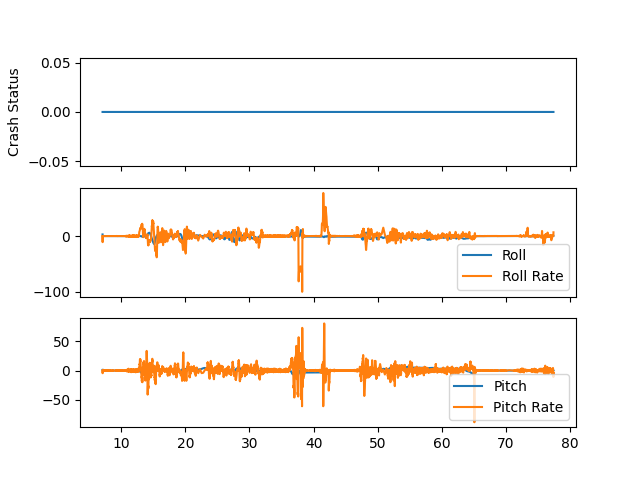

In [7]:
f, axs = plt.subplots(3, sharex=True)

axs[0].plot(t_clip, is_crash, label="Crashed?")
axs[0].set_ylabel("Crash Status")

axs[1].plot(t_clip, roll, label="Roll")
axs[1].plot(t_clip, p, label="Roll Rate")
axs[1].legend()

axs[2].plot(t_clip, pitch, label="Pitch")
axs[2].plot(t_clip, q, label="Pitch Rate")
axs[2].legend()

plt.show()

# Roll Control

## Inner Loop

<IPython.core.display.Javascript object>


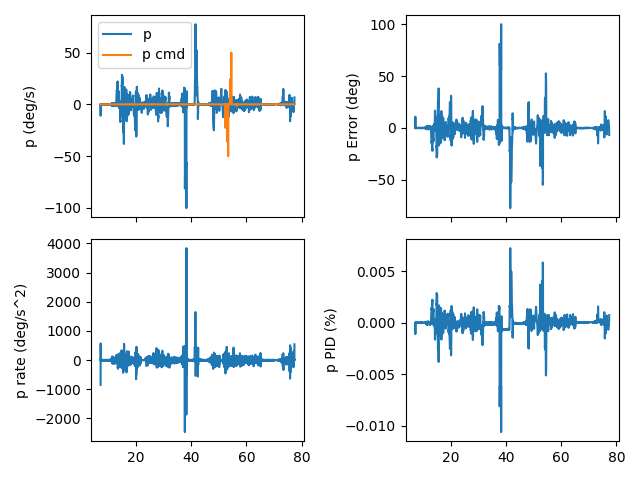

In [8]:
plot_rate(t_clip, p_cmd, p, np.gradient(p, t_clip), p_pid, "p")

## Outer Loop

<IPython.core.display.Javascript object>


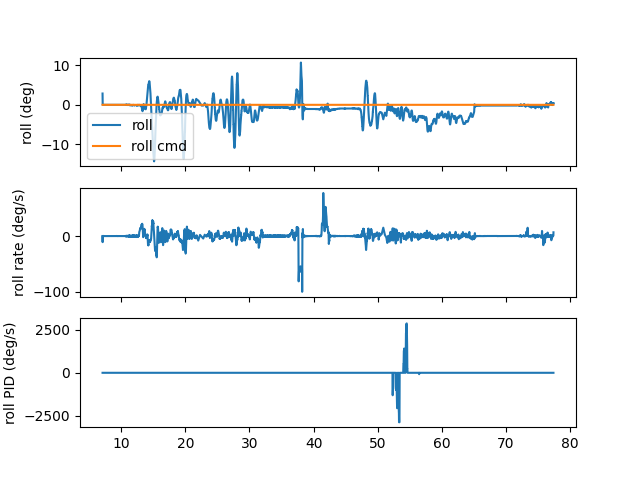

In [9]:
plot_angle(t_clip, roll_cmd, roll, p, np.degrees(roll_pid), label="roll")

# Pitch Control

## Inner Loop

<IPython.core.display.Javascript object>


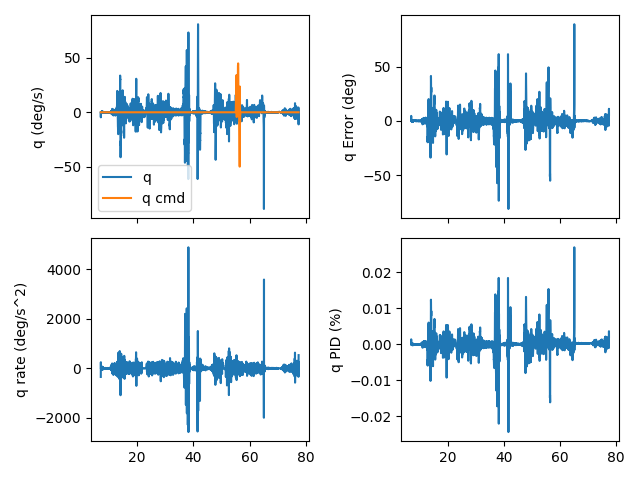

In [10]:
plot_rate(t_clip, q_cmd, q, np.gradient(q, t_clip), q_pid, "q")

## Outer Loop

<IPython.core.display.Javascript object>


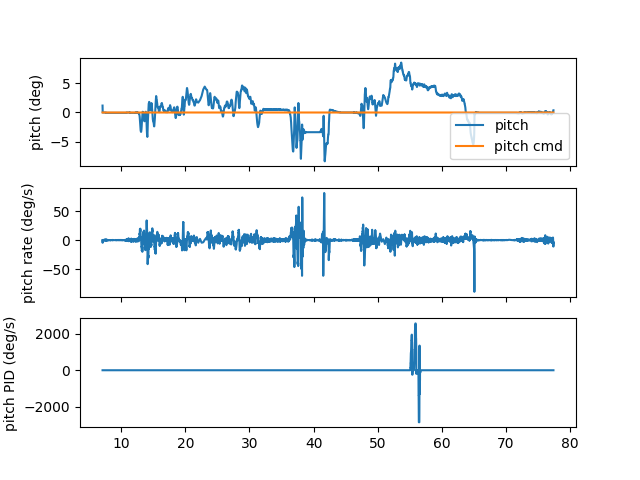

In [11]:
plot_angle(t_clip, pitch_cmd, pitch, q, np.degrees(pitch_pid), label="pitch")

# Yaw Control

## Inner Loop

<IPython.core.display.Javascript object>


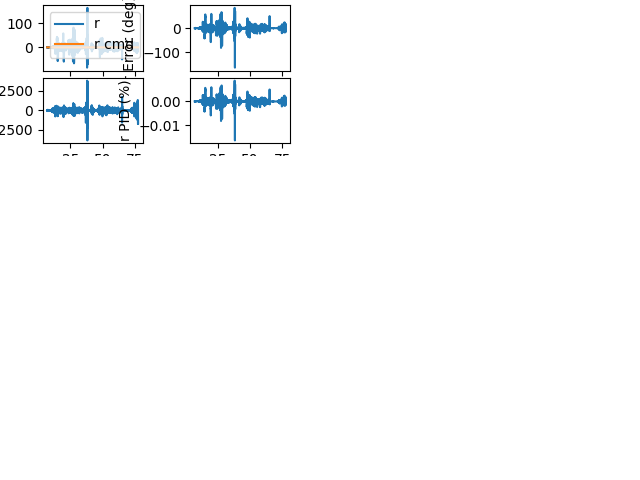

In [12]:
plot_rate(t_clip, r_cmd, r, np.gradient(r, t_clip), r_pid, "r")

## Outer Loop

<IPython.core.display.Javascript object>


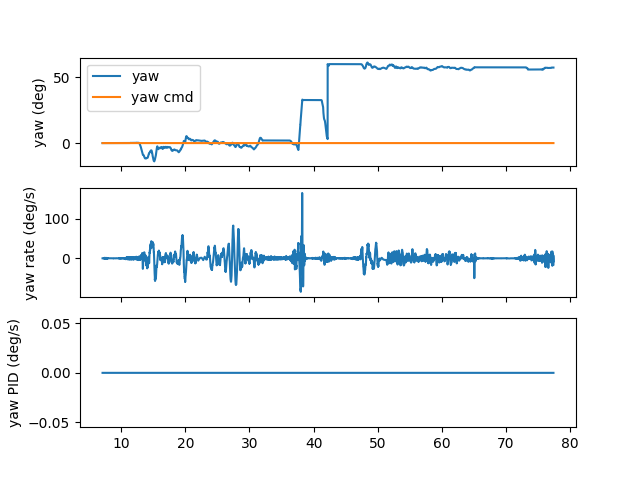

In [13]:
plot_angle(t_clip, yaw_cmd, yaw, r, yaw_pid, label="yaw")

# Motor Allocation

In [14]:
MAX_PWM = 2**14 - 1

def motor_pwm_to_pct(pwm, min_pwm_duty=0.051*MAX_PWM, max_pwm_duty=0.1*MAX_PWM):
    # Get PWM range in microseconds
    duty_range = max_pwm_duty - min_pwm_duty
    
    # Get the pwm distance from the lower limit
    pwm_offset = pwm - min_pwm_duty
    
    # Find the power
    power = pwm_offset / duty_range
    
    return power

<IPython.core.display.Javascript object>


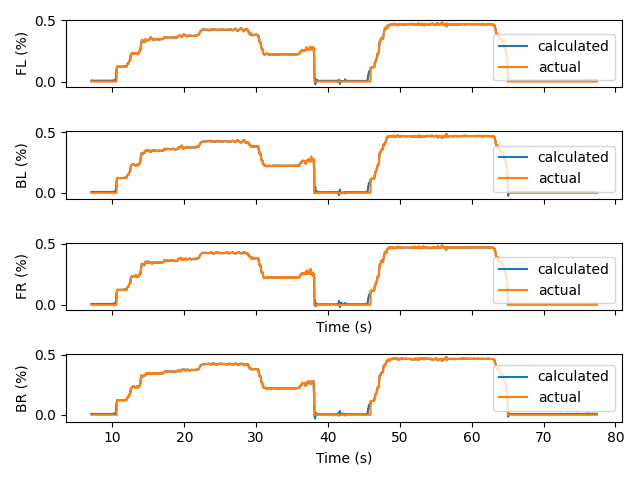

In [15]:
throttle_pct = throttle_np #* 0 + 0.5
front_left_out  = throttle_pct - p_pid + q_pid + r_pid
back_left_out   = throttle_pct - p_pid - q_pid - r_pid
front_right_out = throttle_pct + p_pid + q_pid - r_pid
back_right_out  = throttle_pct + p_pid - q_pid + r_pid

# Get actual motor powers
fl_power = power_np[idx_start:idx_end, 0]
bl_power = power_np[idx_start:idx_end, 1]
fr_power = power_np[idx_start:idx_end, 2]
br_power = power_np[idx_start:idx_end, 3]

# Plotting expected motor thrust allocation
f, axs = plt.subplots(4, sharex=True)

axs[0].plot(t_clip, front_left_out, label='calculated')
axs[0].plot(t_clip, fl_power, label='actual')
axs[0].set_ylabel("FL (%)")
axs[0].legend()

axs[1].plot(t_clip, back_left_out, label='calculated')
axs[1].plot(t_clip, bl_power, label='actual')
axs[1].set_ylabel("BL (%)")
axs[1].legend()

axs[2].plot(t_clip, front_right_out, label='calculated')
axs[2].plot(t_clip, fr_power, label='actual')
axs[2].set_ylabel("FR (%)")
axs[2].set_xlabel("Time (s)")
axs[2].legend()

axs[3].plot(t_clip, back_right_out, label='calculated')
axs[3].plot(t_clip, br_power, label='actual')
axs[3].set_ylabel("BR (%)")
axs[3].set_xlabel("Time (s)")
axs[3].legend()

f.tight_layout()

plt.show()

In [16]:
# Left - Right
front_delta = fl_power - fr_power
back_delta  = bl_power - br_power

# Plotting expected motor thrust allocation
f, axs = plt.subplots(2, sharex=True)

axs[0].plot(t_clip, front_delta)
axs[0].set_ylabel("Front (%)")

axs[1].plot(t_clip, back_delta)
axs[1].set_ylabel("Back (%)")

f.tight_layout()

plt.show()

<IPython.core.display.Javascript object>